# LinearSVC

In [46]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler       # scaling data
from sklearn.neighbors import KNeighborsRegressor    # regressor
from sklearn.model_selection import GridSearchCV     # for grid search
from sklearn.pipeline import make_pipeline           # for making pipelines
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import warnings
warnings.filterwarnings('ignore') 

## Import Data and Packages

In [131]:
import math
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns # for visualiation
import matplotlib.pyplot as plt # plotting
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import altair as alt
alt.renderers.enable('notebook')

df = pd.read_csv('./facebook_with_reactions.csv')
outcomes = df[['Rating']]

## drop useless columns 
df = df.drop(columns=['Debate', 'status_link', 'permalink_url', 'Post URL', 
                      'status_message', 'link_name', 'share_count', 'Unnamed: 0', 'account_id',
                      'status_id', 'status_type', 'status_published'])

## remove spaces in columns
df.columns = [c.replace(' ', '_') for c in df.columns]

## Create copy of data for modeling
model_data = df.copy()
graph_data = df.copy()
## change Rating to numeric for classification
graph_data.Rating = graph_data.Rating.replace(['mostly false', 'no factual content', 'mixture of true and false', 'mostly true'], [0,1,2,3]).astype(int)
model_data.Rating = model_data.Rating.replace(['mostly false', 'no factual content', 'mixture of true and false', 'mostly true'], [0,0,0,1]).astype(int)

model_data = model_data.drop(columns=['post_id', 'reaction_count'])
## make dummy columns (make categories numeric)
model_data = pd.get_dummies(model_data)

## Make test and validation data
df_target=model_data['Rating']
df_dropped=model_data
df_dropped=df_dropped.drop(columns=['Rating'])


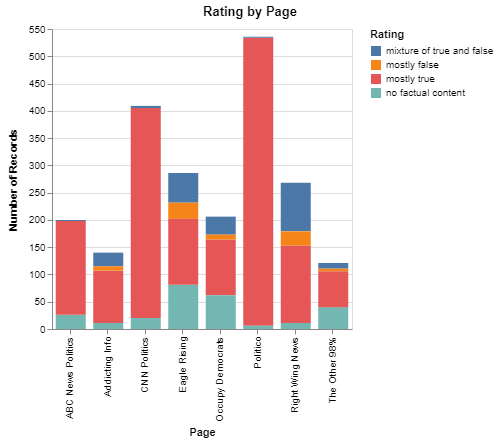

In [73]:
# Plot showing the amount of posts each source made in each "Rating"
alt.Chart(df).mark_bar(size=30).encode(
    x='Page',
    y='count()',
    color='Rating'
).properties(width=300, height=300, title='Rating by Page')

## Handle Nulls

In [57]:
model_data.fillna(method='ffill',inplace=True)

## Feature Selection

In [30]:
from boruta import BorutaPy

In [52]:
df_corr = df_dropped.corr()
[(sorted(abs(x),reverse=True)[1],y) for (x,y) in zip(df_corr.values,df_corr.index) if sorted(abs(x),reverse=True)[1] > 0.8]

[(0.9851900394574168, 'comment_count'),
 (0.9934614632397851, 'num_reactions'),
 (0.9851900394574168, 'num_comments'),
 (0.8796823438566503, 'num_shares'),
 (0.9934614632397851, 'num_likes'),
 (0.8499930450155352, 'num_loves')]

In [38]:
#svc = LinearSVC()
#feat_selector = BorutaPy(svc, n_estimators='auto', verbose=2)
final_features = ['']

## Pipeline

In [140]:
# Split data into training and testing data
train_features, test_features, train_outcome, test_outcome = train_test_split(
   df_dropped,
   df_target,
   test_size=0.30
)

In [142]:
pipe = make_pipeline(MinMaxScaler(), LinearSVC())
param_grid = {}
grid = GridSearchCV(pipe, param_grid, cv = KFold(n_splits=10, shuffle=True))
grid.fit(train_features, train_outcome)
grid.score(test_features, test_outcome)

#df_selected_1= feature_selection(df_dropped,df_target,model_data)

0.8076923076923077